In [33]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [24]:
names = open('names.txt','r').read().splitlines()

In [25]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [21]:
len(names)

32033

In [26]:
bigrams = {}
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram,0) + 1

In [27]:
bigrams

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [30]:
bigrams[('s','e')]

884

In [28]:
sorted(bigrams.items(),key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [54]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i+1:s for i,s in enumerate(chars)}
itos[0] = '.'

In [48]:
itos[0]

'.'

In [58]:
N = torch.zeros((27,27), dtype=torch.int32)
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        N[ch1stoi,ch2stoi] += 1

In [51]:
print(bigrams[('s','e')])
print(N[stoi['s'],stoi['e']])

884
tensor(884, dtype=torch.int32)


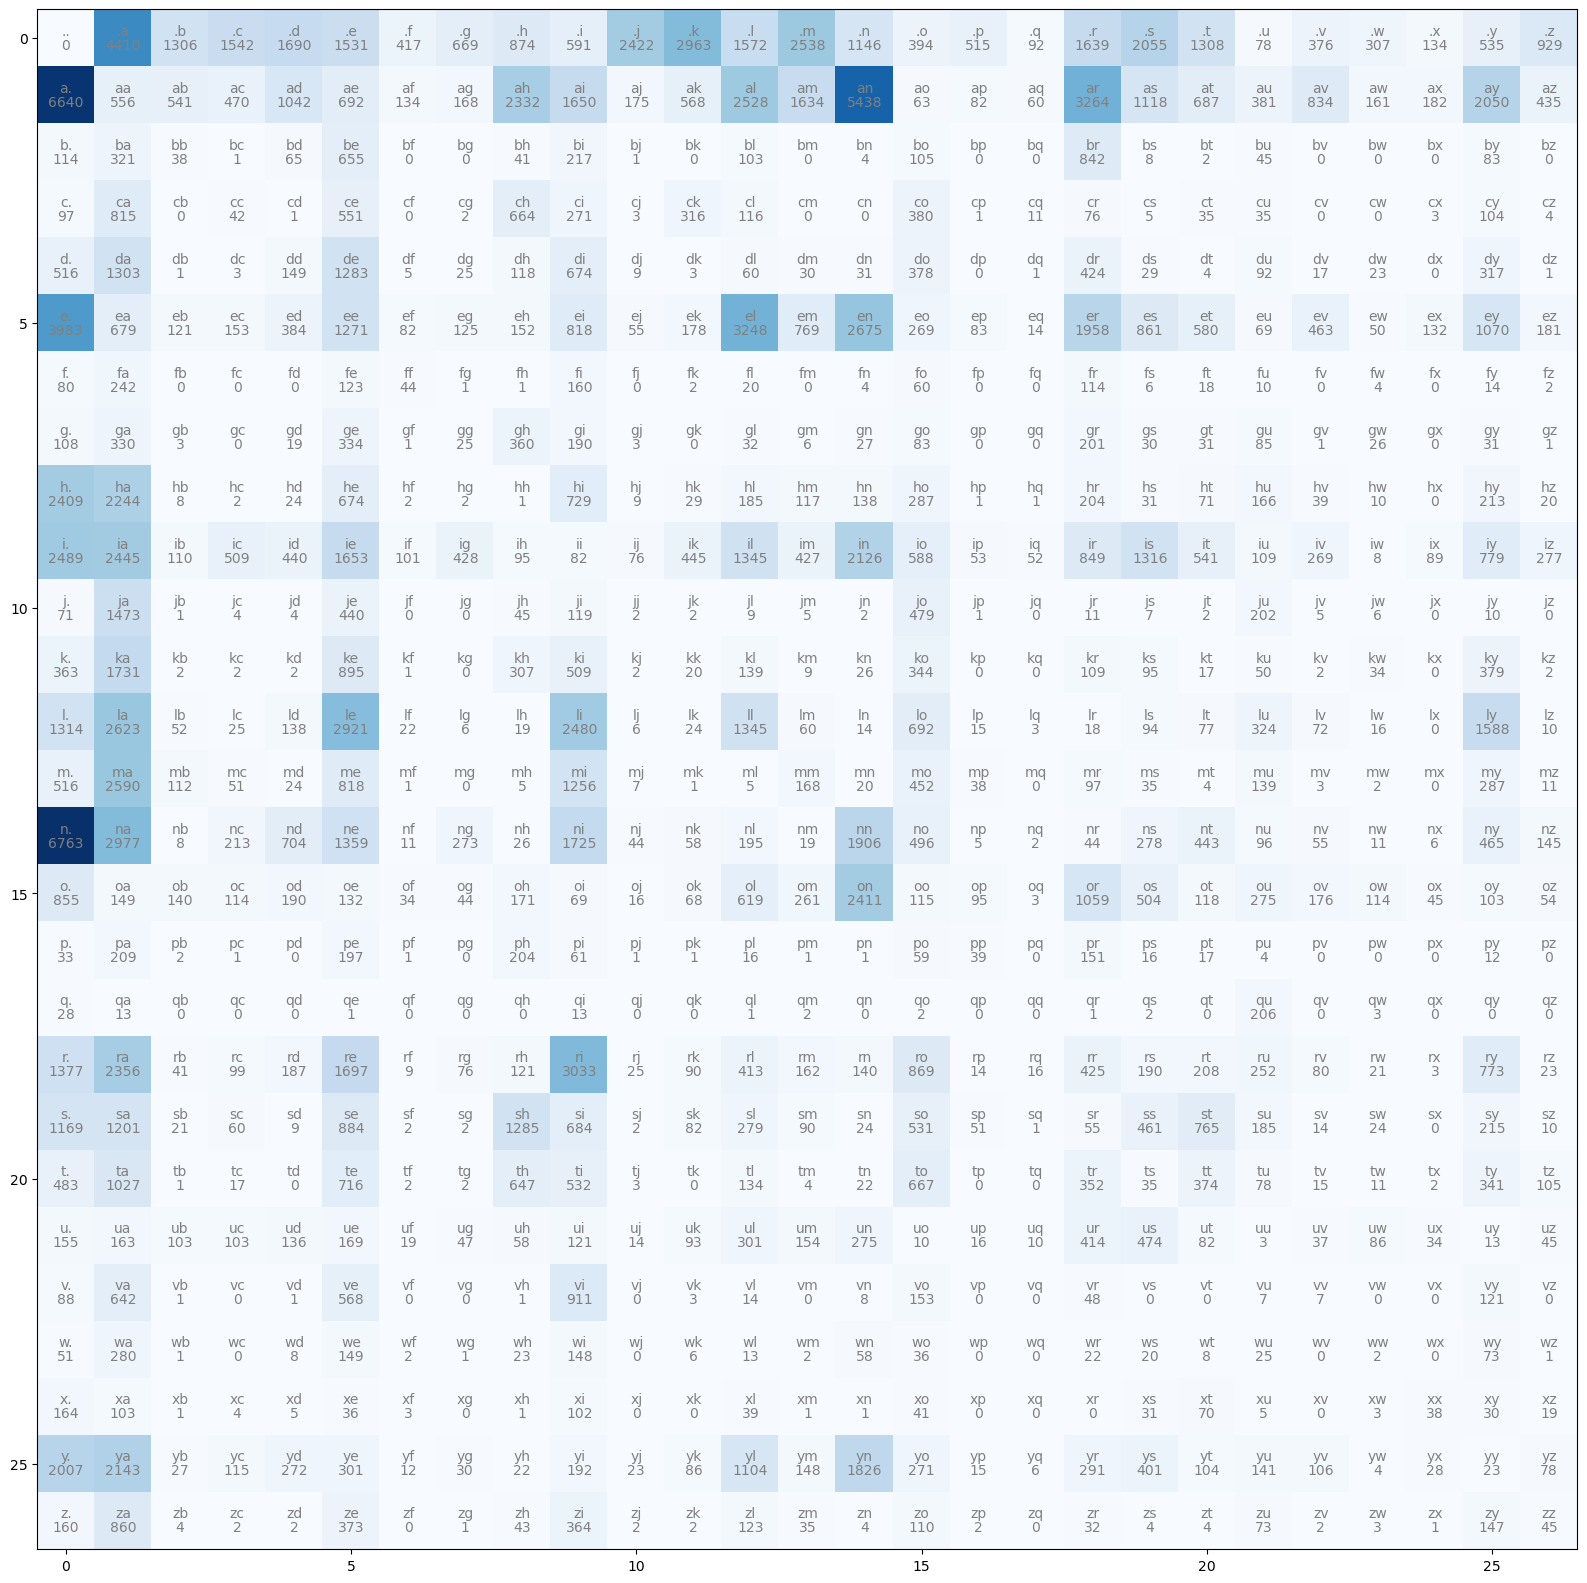

In [59]:
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")

In [66]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [76]:
ix = torch.multinomial(p, num_samples=1, replacement=True).item()
itos[ix]

'n'

In [110]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [112]:
P[2]

tensor([0.0431, 0.1214, 0.0144, 0.0004, 0.0246, 0.2476, 0.0000, 0.0000, 0.0155,
        0.0820, 0.0004, 0.0000, 0.0389, 0.0000, 0.0015, 0.0397, 0.0000, 0.0000,
        0.3183, 0.0030, 0.0008, 0.0170, 0.0000, 0.0000, 0.0000, 0.0314, 0.0000])

In [113]:
for i in range(20):
    ix = 0
    name = '.'
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        name += itos[ix]
        if ix == 0:
            break
    print(name)

.xavyloty.
.kirilam.
.ro.
.zahaniarlianillstynttambelo.
.eleso.
.uarguwan.
.jalwdr.
.amohannefion.
.kselere.
.trirush.
.gho.
.aifan.
.e.
.menaset.
.mucevollilas.
.nsy.
.olylobiserangrdaupon.
.rmysen.
.a.
.jamayenan.


In [133]:
nll = 0
for name in names[:3]:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        prob = P[ch1stoi, ch2stoi]
        logprob = torch.log(prob)
        nll -= logprob
        print(f"{ch1+ch2} {prob:.4f} {-logprob:.4f}")
nll

.e 0.0478 3.0408
em 0.0377 3.2793
mm 0.0253 3.6772
ma 0.3899 0.9418
a. 0.1960 1.6299
.o 0.0123 4.3982
ol 0.0780 2.5508
li 0.1777 1.7278
iv 0.0152 4.1867
vi 0.3541 1.0383
ia 0.1381 1.9796
a. 0.1960 1.6299
.a 0.1377 1.9829
av 0.0246 3.7045
va 0.2495 1.3882
a. 0.1960 1.6299


tensor(38.7856)

tensor(38.7856)

Now let us try to do trigram

In [124]:
trigrams = {}
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        trigrams[trigram] = trigrams.get(trigram,0) + 1

In [126]:
N3 = torch.zeros((27,27,27), dtype=torch.int32)
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        ch3stoi = stoi[ch3]
        N3[ch1stoi,ch2stoi,ch3stoi] += 1

In [127]:
P3 = N3.float()
P3 /= P3.sum(2, keepdim=True)

In [128]:
P3[4,5]

tensor([0.0717, 0.0343, 0.0047, 0.0218, 0.0062, 0.0491, 0.0008, 0.0016, 0.0031,
        0.0078, 0.0094, 0.0125, 0.1691, 0.0663, 0.2479, 0.0164, 0.0000, 0.0016,
        0.1161, 0.0553, 0.0070, 0.0039, 0.0436, 0.0039, 0.0047, 0.0234, 0.0179])

In [134]:
for i in range(20):
    ix1 = 0
    p = P[ix1]
    ix2 = torch.multinomial(p, num_samples=1, replacement=True).item()
    name = '.'+itos[ix2]
    while True:
        p = P3[ix1,ix2]
        ix3 = torch.multinomial(p, num_samples=1, replacement=True).item()
        name += itos[ix3]
        if ix3 == 0:
            break
        ix1 = ix2
        ix2 = ix3
    print(name)

.gelden.
.ka.
.racey.
.allyxanna.
.lanend.
.anin.
.emon.
.kora.
.crue.
.kariah.
.metum.
.naleres.
.mie.
.mon.
.belypto.
.thun.
.no.
.ko.
.amar.
.vand.


In [132]:
nll = 0
for name in names[:3]:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        ch3stoi = stoi[ch3]
        prob = P3[ch1stoi, ch2stoi, ch3stoi]
        logprob = torch.log(prob)
        nll -= logprob
        print(f"{ch1+ch2+ch3} {prob:.4f} {-logprob:.4f}")
nll

.em 0.1881 1.6707
emm 0.1300 2.0399
mma 0.4286 0.8473
ma. 0.0672 2.7004
.ol 0.2640 1.3320
oli 0.1115 2.1940
liv 0.0218 3.8270
ivi 0.2900 1.2380
via 0.1614 1.8241
ia. 0.3693 0.9961
.av 0.0551 2.8986
ava 0.1930 1.6448
va. 0.1449 1.9320


tensor(25.1449)